In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import random

In [2]:
#IMPORTATION DES DONNEES

In [3]:
# Charger les données depuis un fichier CSV (remplacez 'path_to_file' par le chemin de votre fichier)
data = pd.read_csv('JobSurveyIndia.csv')
data.head(10)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
5,5,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
6,6,Private Sector,Art,Yes,Yes,4.0,More Than 1500K
7,7,Private Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
8,8,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
9,9,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K


In [4]:
#EXPLORATION 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [6]:
# Détection des doublons
duplicates = data.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


In [7]:
# Détection des valeurs manquantes
missing_values = data.isnull().sum()
print(f"Valeurs manquantes : \n{missing_values}")

Valeurs manquantes : 
Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64


In [8]:
# NETTOYAGE DES DONNEES

In [9]:
# Suppression des doublons
data = data.drop_duplicates()

In [10]:
# Suppression ou imputation des valeurs manquantes (exemple avec imputation)
# Séparation des colonnes numériques et non numériques
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [11]:
# Imputation des valeurs manquantes pour les colonnes numériques avec la médiane
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [12]:
# Imputation des valeurs manquantes pour les colonnes non numériques avec le mode
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])


In [13]:
# Vérification des valeurs manquantes après imputation
missing_values_post = data.isnull().sum()
print(f"Valeurs manquantes après imputation : \n{missing_values_post}")
data.head()

Valeurs manquantes après imputation : 
Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64


,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [14]:
# Suppression de la colonne 'Unnamed: 0' car elle n'est pas pertinente
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [15]:
# Conversion des colonnes catégorielles en type 'category'
categorical_columns = ['Employment Sector', 'Employment Background', 'Public Dealing', 'Degree', 'IdealYearlyIncome']
for column in categorical_columns:
    data[column] = data[column].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Employment Sector      400 non-null    category
 1   Employment Background  400 non-null    category
 2   Public Dealing         400 non-null    category
 3   Degree                 400 non-null    category
 4   IdealNumberOfWorkdays  400 non-null    float64 
 5   IdealYearlyIncome      400 non-null    category
dtypes: category(5), float64(1)
memory usage: 6.0 KB


In [16]:
# ENCODAGE DES VARIABLES

In [17]:
# Encodage des variables catégorielles
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,IdealNumberOfWorkdays,Employment Sector_Government Sector,Employment Sector_Private Sector,Employment Background_Art,Employment Background_Non-Technical,Employment Background_Technical,Public Dealing_No,Public Dealing_Yes,Degree_Yes,Degree_Yes,IdealYearlyIncome_600K-900K,IdealYearlyIncome_900K-1200K,IdealYearlyIncome_More Than 1500K
0,4.0,False,True,False,False,True,False,False,True,False,False,False,True
1,4.0,False,True,True,False,False,True,False,False,True,True,False,False
2,6.0,True,False,False,False,True,False,False,True,False,False,True,False
3,4.0,True,False,False,True,False,False,True,False,True,False,True,False
4,5.0,False,True,False,False,True,False,False,True,False,False,False,False


In [18]:
# CREATION ET VALIDATION DU MODELE

In [19]:
# Séparation des données en variables d'entrée (features) et variable cible (target)
# Esorina anaty dataset le variable à prédire
X = data_encoded.drop(columns=[
    'IdealYearlyIncome_More Than 1500K',
    'IdealYearlyIncome_900K-1200K', 
    'IdealYearlyIncome_600K-900K'
])
y = data['IdealYearlyIncome']

In [20]:
# Division du dataset en jeux d'entraînement et de test 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Choix de l'algorithme de machine learning (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

In [22]:
# Entraînement du modèle
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

In [24]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision/ Accuracy: {accuracy}")
print(f"Rapport de Classification :\n{report}")

Précision/ Accuracy: 0.825
Rapport de Classification :
                 precision    recall  f1-score   support

    1200K-1500K       0.87      0.81      0.84        16
      600K-900K       1.00      0.85      0.92        13
     900K-1200K       0.76      0.94      0.84        34
More Than 1500K       0.83      0.59      0.69        17

       accuracy                           0.82        80
      macro avg       0.87      0.80      0.82        80
   weighted avg       0.84      0.82      0.82        80



In [25]:
# TEST DE PREDICTION AVEC DONNÉES EXTERIEUR

In [26]:
# Exemple de nouvelles données
new_data = pd.DataFrame({
    'Employment Sector': ['Private Sector', 'Government Sector'],
    'Employment Background': ['Technical', 'Non-Technical'],
    'Public Dealing': ['Yes', 'No'],
    'Degree': ['MBA', 'BSc']
})
new_data.head()

,Employment Sector,Employment Background,Public Dealing,Degree
0,Private Sector,Technical,Yes,MBA
1,Government Sector,Non-Technical,No,BSc


In [27]:
# Prétraitement des nouvelles données
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

In [28]:
# Aligner les nouvelles données avec les colonnes d'entraînement
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

In [29]:
# Prédictions sur les nouvelles données
new_predictions = model.predict(new_data_encoded)
# Afficher les prédictions
print(new_predictions)

['More Than 1500K' '900K-1200K']


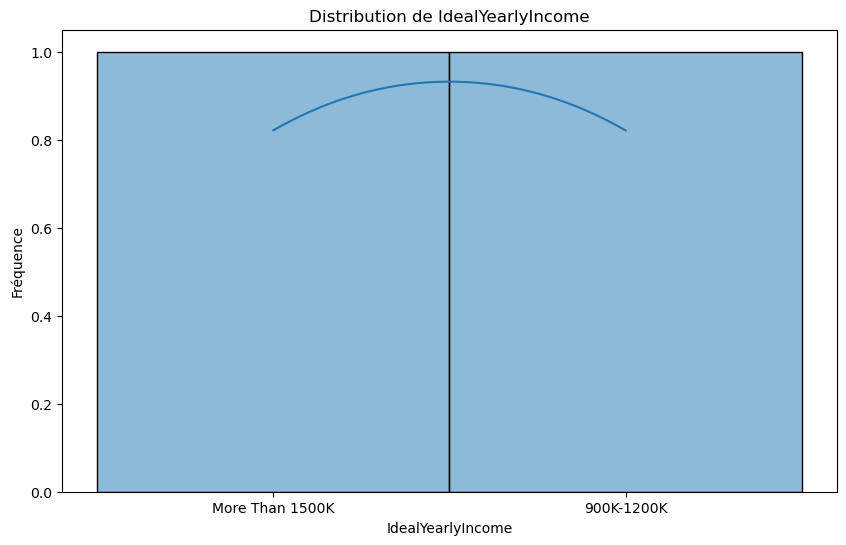

In [30]:
# Afficher un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=new_predictions, kde=True, bins=30)
plt.title('Distribution de IdealYearlyIncome')
plt.xlabel('IdealYearlyIncome')
plt.ylabel('Fréquence')
plt.show()

In [31]:
# PRINT Y
print(y_test)
print(y_pred)

209    More Than 1500K
280         900K-1200K
33         1200K-1500K
210          600K-900K
93          900K-1200K
            ...       
246         900K-1200K
227         900K-1200K
369         900K-1200K
176          600K-900K
289        1200K-1500K
Name: IdealYearlyIncome, Length: 80, dtype: category
Categories (4, object): ['1200K-1500K', '600K-900K', '900K-1200K', 'More Than 1500K']
['More Than 1500K' '900K-1200K' '1200K-1500K' '600K-900K' '900K-1200K'
 '600K-900K' '900K-1200K' '900K-1200K' '900K-1200K' 'More Than 1500K'
 '900K-1200K' '900K-1200K' '1200K-1500K' '900K-1200K' 'More Than 1500K'
 '900K-1200K' '600K-900K' '900K-1200K' '600K-900K' '900K-1200K'
 'More Than 1500K' 'More Than 1500K' '900K-1200K' '600K-900K'
 'More Than 1500K' '900K-1200K' '1200K-1500K' '900K-1200K' '900K-1200K'
 '900K-1200K' '600K-900K' '600K-900K' '600K-900K' '1200K-1500K'
 '900K-1200K' '900K-1200K' '900K-1200K' '900K-1200K' '900K-1200K'
 '1200K-1500K' '1200K-1500K' '900K-1200K' '900K-1200K' '900K-1200K'

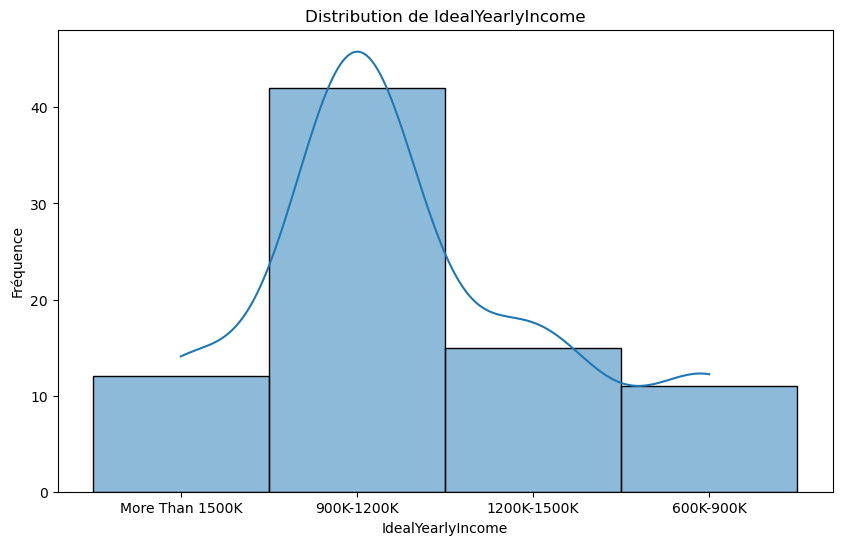

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=y_pred, kde=True, bins=30)
plt.title('Distribution de IdealYearlyIncome')
plt.xlabel('IdealYearlyIncome')
plt.ylabel('Fréquence')
plt.show()

In [33]:
# AFFICHAGE DES Y_BASE

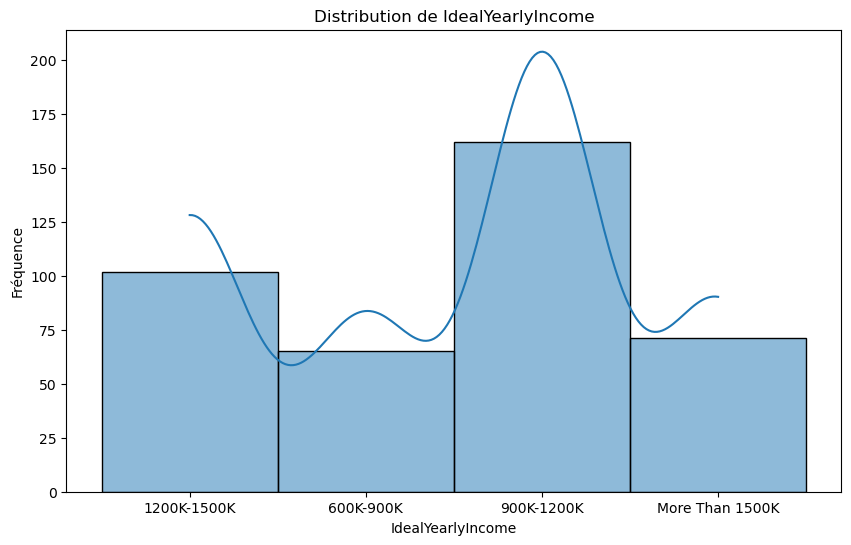

In [34]:
# Afficher un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data['IdealYearlyIncome'], kde=True, bins=30)
plt.title('Distribution de IdealYearlyIncome')
plt.xlabel('IdealYearlyIncome')
plt.ylabel('Fréquence')
plt.show()

In [35]:
# NAMORONA DATASET BOBAKA VAOVAO MBA AHITANA NY PRECISION 

In [36]:
# Définir les différentes catégories pour chaque colonne
employment_sectors = ['Private Sector', 'Government Sector']
employment_backgrounds = ['Technical', 'Non-Technical']
public_dealings = ['Yes', 'No']
degrees = ['MBA', 'BSc']

In [37]:
# Générer toutes les combinaisons possibles
combinations = list(itertools.product(employment_sectors, employment_backgrounds, public_dealings, degrees))
# Vérifier le nombre total de combinaisons
print(f"Nombre total de combinaisons possibles: {len(combinations)}")

Nombre total de combinaisons possibles: 16


In [38]:
# Mélanger les combinaisons et sélectionner 30 valeurs aléatoires
random.seed(42)  # Pour la reproductibilité
sampled_combinations = random.sample(combinations, 16)

In [39]:
# Créer un DataFrame à partir des combinaisons échantillonnées
new_data = pd.DataFrame(sampled_combinations, columns=['Employment Sector', 'Employment Background', 'Public Dealing', 'Degree'])

# Afficher les premières lignes du nouveau DataFrame
print(new_data.head(10))

   Employment Sector Employment Background Public Dealing Degree
0     Private Sector             Technical             No    BSc
1     Private Sector             Technical            Yes    MBA
2  Government Sector             Technical             No    BSc
3     Private Sector         Non-Technical            Yes    MBA
4  Government Sector         Non-Technical             No    BSc
5  Government Sector         Non-Technical            Yes    BSc
6     Private Sector             Technical             No    MBA
7     Private Sector             Technical            Yes    BSc
8  Government Sector             Technical            Yes    MBA
9  Government Sector         Non-Technical            Yes    MBA


In [40]:
# Prétraitement des nouvelles données
new_data_encoded_2 = pd.get_dummies(new_data, drop_first=True)

In [41]:
# Aligner les nouvelles données avec les colonnes d'entraînement
new_data_encoded_2 = new_data_encoded_2.reindex(columns=X_train.columns, fill_value=0)

In [42]:
# Prédictions sur les nouvelles données
new_predictions_2 = model.predict(new_data_encoded_2)
# Afficher les prédictions
print(new_predictions_2)

['More Than 1500K' 'More Than 1500K' '900K-1200K' 'More Than 1500K'
 '900K-1200K' '900K-1200K' 'More Than 1500K' 'More Than 1500K'
 'More Than 1500K' '900K-1200K' '900K-1200K' '900K-1200K'
 'More Than 1500K' 'More Than 1500K' 'More Than 1500K' 'More Than 1500K']


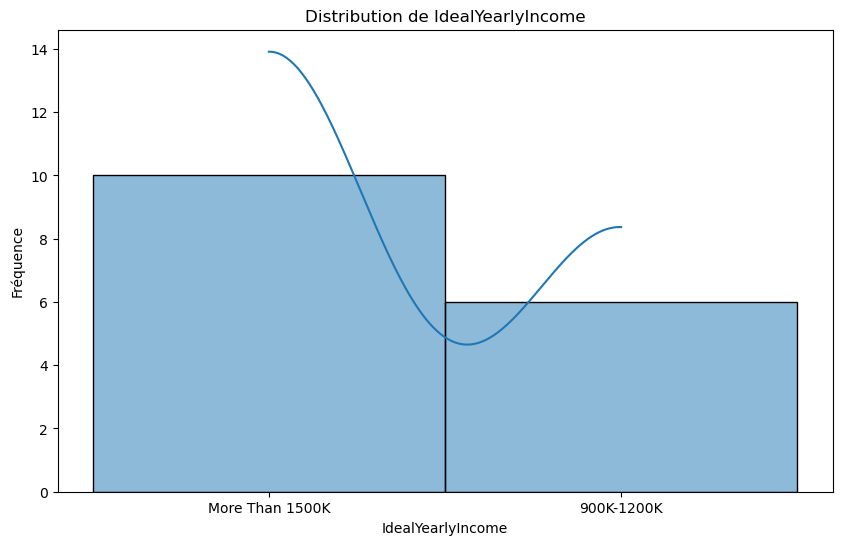

In [43]:
# Afficher un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=new_predictions_2, kde=True, bins=30)
plt.title('Distribution de IdealYearlyIncome')
plt.xlabel('IdealYearlyIncome')
plt.ylabel('Fréquence')
plt.show()